Unnamed: 0    0
id            0
age           0
gender        0
diagnosed     0
AU_01_t12     0
AU_06_t12     0
AU_12_t12     0
AU_04_t13     0
AU_07_t13     0
AU_09_t13     0
AU_01_t14     0
AU_02_t14     0
AU_04_t14     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default 

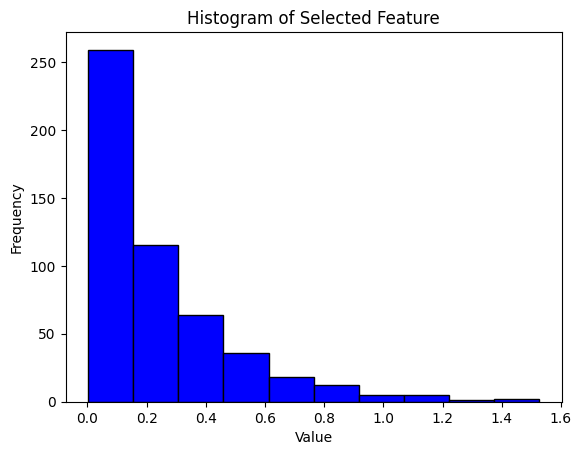

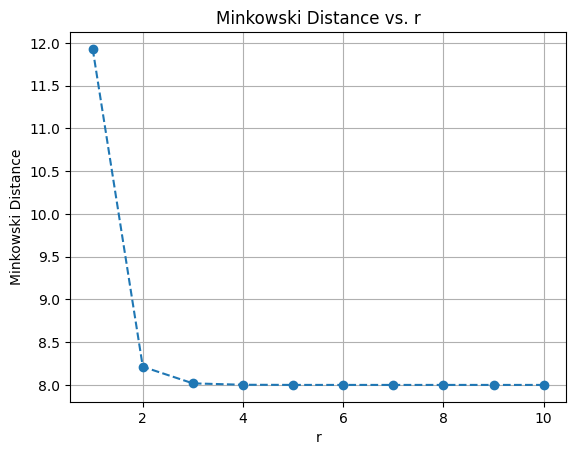

Accuracy for kNN (k=3): 0.9711538461538461
Accuracy for NN (k=1): 0.9423076923076923


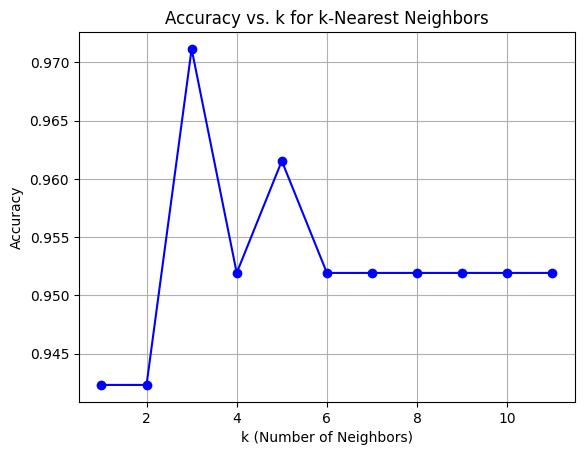

Accuracy: 0.9519230769230769
Confusion Matrix:
[[94  4]
 [ 5  1]]
Precision: 0.2
Recall: 0.16666666666666666
F1-Score: 0.1818181818181818
The model is tending towards overfitting.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("face_mimic_df.csv")

# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Group the data by the 'diagnosed' column
grouped = data.groupby("diagnosed")

# Separate the data into Class A and Class B
class_A_data = data[data['diagnosed'] == 0]
class_B_data = data[data['diagnosed'] == 1]

# Calculate the centroids and standard deviations for Class A and Class B
centroid_A_mean = np.mean(class_A_data, axis=0)
centroid_B_mean = np.mean(class_B_data, axis=0)
centroid_A_std = np.std(class_A_data, axis=0)
centroid_B_std = np.std(class_B_data, axis=0)

# Calculate the Euclidean distance between centroids
euclidean_distance = np.linalg.norm(centroid_A_mean - centroid_B_mean)

# Select a feature for analysis (e.g., 'AU_06_t12')
selected_feature = data['AU_06_t12']

# Create a histogram of the selected feature
num_bins = 10
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins, color='b', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Select two feature vectors for Minkowski distance calculation
vector1 = data.iloc[0, :]
vector2 = data.iloc[1, :]

# Calculate Minkowski distances for r values from 1 to 10
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)
    distances.append(distance)

# Plot Minkowski distances vs. r
plt.plot(r_values, distances, marker='o', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

# Split the data into training and testing sets
x = data.drop("diagnosed", axis=1)
y = data["diagnosed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Initialize and train a kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Make predictions on the test set using kNN
y_pred_knn = knn.predict(x_test)

# Calculate accuracy for kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Initialize and train a NN classifier with k=1
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(x_train, y_train)

# Make predictions on the test set using NN
y_pred_nn = nn.predict(x_test)

# Calculate accuracy for NN
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Print the results
print("Accuracy for kNN (k=3):", accuracy_knn)
print("Accuracy for NN (k=1):", accuracy_nn)

# Initialize lists to store accuracy values
k_values = list(range(1, 12))  # Vary k from 1 to 11
accuracy_values = []

# Iterate through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracy_values.append(accuracy)

# Plot the accuracy values vs. k
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-Nearest Neighbors')
plt.grid(True)
plt.show()

# Calculate confusion matrix and performance metrics
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Determine the model's fit status based on precision and recall
fit_status = ""
if precision > recall:
    fit_status = "The model is tending towards overfitting."
elif precision < recall:
    fit_status = "The model is tending towards underfitting."
else:
    fit_status = "The model has a regular fit."

# Print the results and fit status
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(fit_status)
